In [2]:
# basic functions
import math
import numpy as np
from scipy.special import comb
from scipy.stats import binom

In [27]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.style.use('seaborn') # use seaborn plotting style
mpl.rcParams['font.family'] = 'serif'

%matplotlib inline

**Scipy** has a module called [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) that has a binomial distribution function under the header **Discrete Distributions**

[Scipy.special](https://docs.scipy.org/doc/scipy/reference/special.html)

[Scipy.stats Docs](https://docs.scipy.org/doc/scipy/reference/stats.html) 

**Scipy.stats** uses [**binom.pmf**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom) to calculate the binomial *probability mass function*.

On **page 39** is the example:

> *We could calculate the probability of flipping exactly 12 heads in 24 coin tosses.*

binom.pmf(k,n,p)

k = 12
n = 24
p = 0.5

In [7]:
probability = binom.pmf(12,24,0.5)

round(probability,4) # round returns an integer to four decimal places

0.1612

In [5]:
nums = np.arange(12+24+1)

In [8]:
trials = 12 + 24

In [11]:
discrete_outcomes = [(n,36-n)for n in np.arange(trials+1)]

In [15]:
prob_intervals = np.linspace(0,1.0,num=100)

50.0

In [8]:
probs = [binom.pmf(n,24,0.5) for n in nums]

In [20]:
binom.pmf(trials,2,.1)

0.0

### `Example: Gacha Games`

> Is the probability of getting a E.T. Jaynes card greater than or equal to 0.5?

**ADD LATEX HERE**

number of items (n) = 100

number of ET Jaynes cards (k) is *greater than or equal to one*

random chance of getting ET Jaynes card (p) = 0.720% (not 72.0%!)

There are two ways to approach this problem using scipy:
1. Use binom.sf "survival function"
2. Use binom.cdf "cumulative density function"

We'll use binom.sf first because it is the most similar to the example illustrated in the book. 

The pmf calculates the probability for a specific number k. But since we are only concerned with getinng *one ET Jaynes card **or more*** we want to calculate a cumulative probability. So whether we get 1 card or 20 is OK. So essentially, what we are doing is calculating the pmf for every number up to 100 and adding all of those together.

survival function prob at the random variable is larger (but not) equal to k

binom.sf arguments:

k = this is one less than minimum card we want (1) so 0.

n = number of items (n) or 100

p = 0.720% or 0.00720

what does loc argument mean?

In [9]:
result = binom.sf(0,100,0.00720)

f'{result:.5f} >= 0.5'

'0.51451 >= 0.5'

Since 51.4% is greater than 50.0%, buy the cards

The other way to go about this is to use binom.cdf

What binom.cdf essentially says is we are looking for *the cumulative density up to a number*'. In this case that number is zero because if we get one, we're happy.

The difference is that in this method, we're calculating the amount below our number (1) which is that chance we won't get one card.

So we have to subtract this from 1 to get the 0.51451 answer.

In [10]:
1- binom.cdf(1,100,0.0072)

0.16242880152251793

Bonus example: What are the chances of getting at least two ET Jaynes cards?

In [11]:
sf_chance = binom.sf(1,100,0.0072)
cdf_chance = 1 - binom.cdf(1,100,0.0072)
print(f'sf approach: {sf_chance:.5f}')
print(f'cdf approach: {cdf_chance:.5f}')

sf approach: 0.16243
cdf approach: 0.16243


### `Summary of Python used:`

combinations: comb(N,k,exact=True)

binomial probability mass function: binom.pmf(k,n,p)

binomial survival function: binom.sf(k,n,p)

binomial cumulative density function: binom.cdf(k,n,p)

### `Questions`

1. *What are the parameters of the binomial distribution for the probability of rolling either a 1 or 20 on a 20-sided die, if we roll the dies 12 times?*

In [30]:
#n is the number of rolls or 'events'
#k is the number of times we are looking for (in this case a single 1 or 20)

> P(1 or 20) = 1/20 + 1/20 = 1/10<br>
> p = 1/10<br>
> n = 12<br>
> k =1

In [31]:
chance_1_or_20 = binom.pmf(1,12,0.1) * 100

In [32]:
f"Chance of rolling a 1 or 20 in 12 rolls: {chance_1_or_20:.1f}%"

'Chance of rolling a 1 or 20 in 12 rolls: 37.7%'

*`2. There are four aces in a deck of 52 cards. If you pull a card, return the card then reshuffle and pull a card again, how ways can you pull just one ace?`*

This is a combinatorics problem. Will Kurt gives a simple intuitive explanation of how to approach the problem in the book's answer key. The Pythonic approach (below) is to recognize that we are looking for five card combinations that include **only one** ace or *'5 choose 1'*.

In [39]:
comb(5,1, exact=True)

5

*`3. For the example in question 2, what is the probability of pulling five aces in 10 pulls (remember the card is shuffled back in the deck when it is pulled)?`*

In [50]:
comb(10,5)

252.0

*`4. When you're searching for a new job, it's alway helpful to have more than one offer on the table so you can use it in negotiations. If you have a 1/5 probability of receiving a job offer when you interview, and you interview with seven companies in a month, what is the probability you'll have at least two competing offers by the end of that month?`*

In this case we are looking for *two job offers or more*.

The best function to use in this scenario is the binomial survival function.

this is: `binom.sf(k,n,p)`

k = one less than the minimum number we want (2-1=1)

n = number of interviews (7)

p = probability of an offer (1/5)

In [78]:
two_offers7 = binom.sf(1,7,1/5)*100

In [79]:
two_offers7

42.32832000000003

*`5. You get a bunch of recruiter emails and find out you have 25 interviews lined up in the next month. Unfortunately, you know this will leave you exhausted, and the probability of getting an offer will drop to 1/10 if you're tired. You really don't want to go on this many interviews unless you are at least twice as likely to get at least two competing offers. Are you more likely to get at least two offers if you got for 25 interviews, or stick to 7?`*

In [67]:
# k = 2
# p =1/10
# n = 25

In [71]:
two_offers25 = binom.sf(1,25,0.1)*100

In [76]:
print(f"25 interviews: {two_offers25:.1f}")
print(f"7 interviews: {two_offers7:.1f}")
print(f"Odds boost: {two_offers25/two_offers7:.2f}")

25 interviews: 72.9
7 interviews: 42.3
Odds boost: 1.72


In [77]:
1.72 >= 2

False

### `Etcetera`
Likely to get deleted later.

In [35]:
def binom_probs(n,p):
    """
    Given p, the chance of getting each number in this sequence.
    """
    seq = [n for n in np.arange(n+1)] # a range start parameter
    return [binom.pmf(s,n,p) for s in seq]

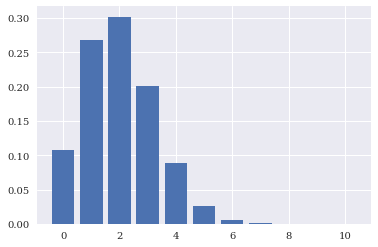

In [49]:
trials = 10
x = np.arange(trials+1)
y = binom_probs(trials,0.2)
plt.bar(x,y);

In [64]:
for n in range(4):
    x = round(binom.cdf(k=n,n=4,p=0.4),4)
    print(f'{n}:\t{x}')

0:	0.1296
1:	0.4752
2:	0.8208
3:	0.9744


In [15]:
# 3 is our k
# 6 is number of tries
# 0.5 is our p
# loc is where in the array we start from...verify with docs

what this says is the chance of "at least two offers" only scenarios are
less than 2 (ie 0 or 1 offers). so binom cdf calculates the array of pdf probs for all seven attempts. then it calculates 

In [69]:
binom.sf(1,n=10,p=0.1)

0.26390107090000003

In [16]:
Lesson idea: How to find a probability problem.

SyntaxError: invalid syntax (<ipython-input-16-3f9c63d33fe4>, line 1)